# Image Filtering

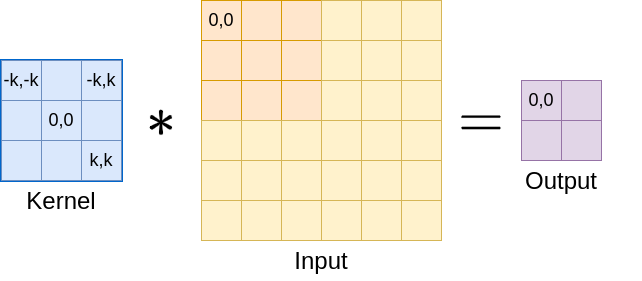

### Correlation

### $\begin{aligned}
G &=h \otimes F \\
G[i, j] &=\sum_{u=-k}^{k} \sum_{v=-k}^{k} h[u, v] F[i+u, j+v]
\end{aligned}$

### Convolution

### $\begin{aligned}
G &=h * F \\
G[i, j] &=\sum_{u=-k}^{k} \sum_{v=-k}^{k} h[u, v] F[i-u, j-v]
\end{aligned}$

### Output Dimension

### $n_{\text {out }}=\frac{n_{i n}+2 p-f}{s}+1$

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
!ls ../images

cat-image.jpg  image-1.png  kernel-indexing.png


In [3]:
img_bgr = cv.imread("../images/image-1.png")

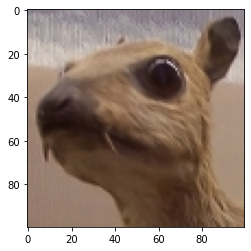

In [4]:
plt.imshow(img_bgr[:,:,::-1])

In [5]:
img_bgr.shape

(100, 100, 3)

In [6]:
kernel = np.array([[1, 0, -1],
                   [0, 0, 0],
                   [-1, 0, 1]])

In [7]:
kernel.shape

(3, 3)

**Kernel = 3x3**
**Stride = 1**
**No Padding**

In [21]:
stride = 1
pad = 0
filter_size = kernel.shape[0]
k = filter_size // 2

### $n_{\text {out }}=\frac{n_{i n}+2 p-f}{s}+1$

In [9]:
w_in = img_bgr.shape[1]
h_in = img_bgr.shape[0]

In [14]:
w_out = int((w_in+2*pad-filter_size)/stride) + 1
h_out = int((h_in+2*pad-filter_size)/stride) + 1

In [15]:
img_out = np.zeros((h_out, w_out))

In [19]:
img_in = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

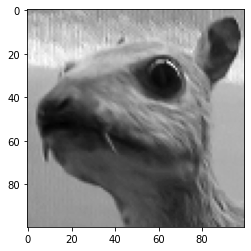

In [20]:
plt.imshow(img_in, cmap="gray")

### $\begin{aligned}
G &=h \otimes F \\
G[i, j] &=\sum_{u=-k}^{k} \sum_{v=-k}^{k} h[u, v] F[i+u, j+v]
\end{aligned}$

In [24]:
for i in range(0, img_out.shape[1]):
    for j in range(0, img_out.shape[0]):
        val = 0
        for u in range(-1*k, k+1):
            for v in range(-1*k, k+1):
                val += kernel[u+k,v+k] * img_in[i+u+k, j+v+k]
        img_out[i,j] = val

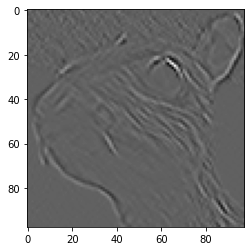

In [26]:
plt.imshow(img_out, cmap="gray")

In [33]:
def rescale(img):
    return ((img-img.min()) * 255/(img.max() - img.min())).astype(np.uint8)

### $\begin{aligned}
G &=h * F \\
G[i, j] &=\sum_{u=-k}^{k} \sum_{v=-k}^{k} h[u, v] F[i-u, j-v]
\end{aligned}$

In [152]:
def convolute(img, kernel):
    stride = 1
    pad = 0
    filter_size = kernel.shape[0]
    k = filter_size // 2
    w_out = int((img.shape[1]+2*pad-filter_size)/stride) + 1
    h_out = int((img.shape[0]+2*pad-filter_size)/stride) + 1
    img_out = np.zeros((h_out, w_out))
    
    for i in range(0, img_out.shape[1]):
        for j in range(0, img_out.shape[0]):
            val = 0
            for u in range(-1*k, k+1):
                for v in range(-1*k, k+1):
                    val += kernel[u+k,v+k] * img[i-u+k, j-v+k]
            img_out[i,j] = val
    return img_out

In [153]:
edge_kernel = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])

edge_out = convolute(img_in, edge_kernel)

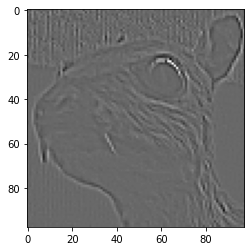

In [154]:
plt.imshow(edge_out, cmap="gray")

In [57]:
edge_out_rescale = rescale(edge_out)

In [68]:
_, bin_img = cv.threshold(edge_out_rescale, 120, 255, cv.THRESH_BINARY_INV)

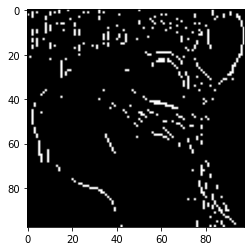

In [69]:
plt.imshow(bin_img, cmap="binary")

In [70]:
edge_kernel = np.array([[1,0,-1],
                        [0,0,0],
                        [-1,0,1]])

edge_out = convolute(img_in, edge_kernel)

In [72]:
edge_out_rescale = rescale(edge_out)

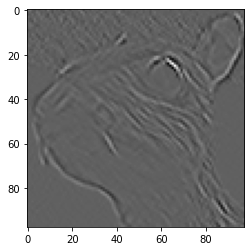

In [73]:
plt.imshow(edge_out_rescale, cmap="gray")

In [82]:
_, bin_img = cv.threshold(edge_out_rescale, 110, 255, cv.THRESH_BINARY_INV)

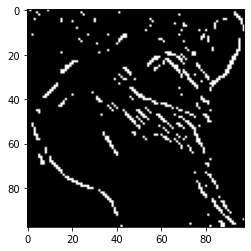

In [83]:
plt.imshow(bin_img, cmap="binary")

In [84]:
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

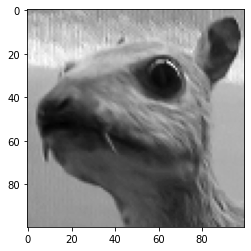

In [85]:
plt.imshow(img_in, cmap="gray")

In [86]:
out_x = convolute(img_in, sobel_x)
out_y = convolute(img_in, sobel_y)

In [87]:
out_img = np.sqrt(out_x**2 + out_y**2)

In [89]:
out_img_sobel = rescale(out_img)

In [99]:
_, bin_img = cv.threshold(out_img_sobel, 60, 255, cv.THRESH_BINARY_INV)

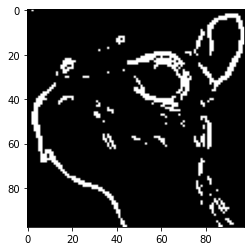

In [100]:
plt.imshow(bin_img, cmap="binary")

## Image Blur

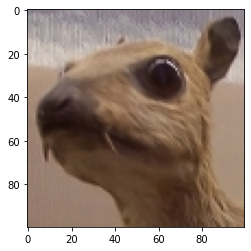

In [126]:
plt.imshow(img_bgr[:,:,::-1])

In [127]:
box_blur = (1/9) * np.array([[1,1,1],
                             [1,1,1],
                             [1,1,1]])

sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

In [118]:
out_b = convolute(img_bgr[:,:,0], box_blur)
out_g = convolute(img_bgr[:,:,1], box_blur)
out_r = convolute(img_bgr[:,:,2], box_blur)

In [119]:
out_b_rescale = rescale(out_b)
out_g_rescale = rescale(out_g)
out_r_rescale = rescale(out_r)

In [120]:
out_blur = np.dstack((out_b_rescale,out_g_rescale,out_r_rescale))

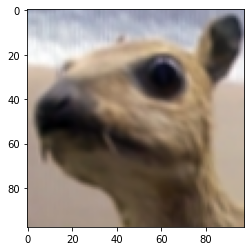

In [121]:
plt.imshow(out_blur[:,:,::-1])

In [128]:
out_b = convolute(img_bgr[:,:,0], sharpen)
out_g = convolute(img_bgr[:,:,1], sharpen)
out_r = convolute(img_bgr[:,:,2], sharpen)

In [129]:
out_b_rescale = rescale(out_b)
out_g_rescale = rescale(out_g)
out_r_rescale = rescale(out_r)

In [130]:
out_sharpen = np.dstack((out_b_rescale, out_g_rescale, out_r_rescale))

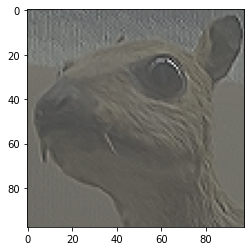

In [134]:
plt.imshow(out_sharpen[:,:,::-1])